In [ ]:
# Install NLTK
!pip install --user -U nltk

# Import NLTK and sentiment analyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Requirement already up-to-date: nltk in /root/.local/lib/python3.6/site-packages (3.5)


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [ ]:
complaint_1 = "Cargo was at her home when officers forcefully entered without a valid search warrant. During the home invasion, officers injured her left foot and toe and she was treated at Jackson Park Hospital for her injuries."
scores = sentiment_analyzer.polarity_scores(complaint_1)
for key, value in scores.items():
  print('{0}: {1}, '.format(key, value))

neg: 0.074, 
neu: 0.926, 
pos: 0.0, 
compound: -0.4019, 


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('../data/nlp.csv')
data = data.drop_duplicates(subset=['allegation_id'], keep='last')
pd.DataFrame(data)

,allegation_id,summary,beat_id,final_finding
4,1000214,"On October 4, 2006, a complaint was registered...",204,NS
5,1000301,"On October 8, 2006, a complaint was registered...",201,SU
7,1000854,"On October 29, 2006, a complaint was registere...",61,NS
9,1000936,"On 01 November 2006, a complaint was registere...",187,SU
11,1001233,"On November 12, 2006, a complaint was register...",123,SU
...,...,...,...,...
1220,314738,"On August 6, 2006, a complaint was registered ...",23,SU
1221,315128,"On August 2005, a complaint was registered wit...",29,SU
1224,315271,"On 02 September 2006, a complaint was register...",266,SU
1225,315303,"On 04 September 2006, a complaint was register...",120,SU


In [ ]:
summaries_SU_not_sampled = data[data['final_finding']=='SU']['summary'].tolist()
summaries_NS = data[data['final_finding']=='NS']['summary'].tolist()

In [ ]:
len(summaries_SU_not_sampled)

554

In [ ]:
len(summaries_NS)

165

In [ ]:
from random import sample
summaries_SU = sample(summaries_SU_not_sampled, len(summaries_NS))

In [ ]:
len(summaries_SU)

165

In [ ]:
su_scores = []
for summary in summaries_SU:
  scores = sentiment_analyzer.polarity_scores(summary)['compound']
  su_scores.append(scores)

ns_scores = []
for summary in summaries_NS:
  scores = sentiment_analyzer.polarity_scores(summary)['compound']
  ns_scores.append(scores)

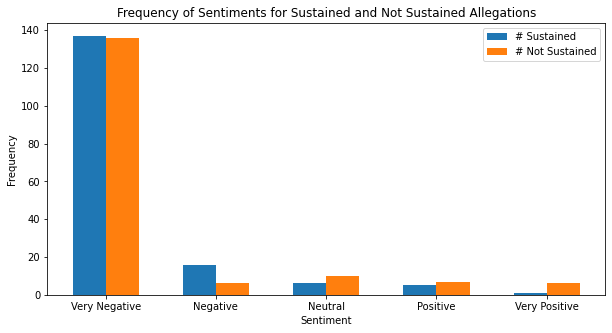

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Numbers of pairs of bars you want
N = 5

# Data on X-axis
out_su = pd.cut(su_scores, bins=[-1, -.6, -.2, 0.2, 0.6, 1], include_lowest=True).value_counts()
out_ns = pd.cut(ns_scores, bins=[-1, -.6, -.2, 0.2, 0.6, 1], include_lowest=True).value_counts()

# Specify the values of blue bars (height)
blue_bar = out_su
# Specify the values of orange bars (height)
orange_bar = out_ns

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='# Sustained')
plt.bar(ind + width, orange_bar, width, label='# Not Sustained')

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Frequency of Sentiments for Sustained and Not Sustained Allegations')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [ ]:
su_dict = {}
for summary in summaries_SU:
  su_dict[summary] = sentiment_analyzer.polarity_scores(summary)['compound']

newDict = dict(filter(lambda elem: elem[1] > 0.6, su_dict.items()))
print(newDict.keys())

dict_keys(['In an incident involving an on-duty CPD Sergeant/ex- boyfriend and the Complainant/ex-girlfriend, it was alleged that, while aboard the Sergeant/ex-boyfriends boat the Sergeant/ex-boyfriend was drinking while on duty, forcefully grabbed the Complainant/ex- girlfriends arm, placed his forearm on the Complainant/ex-girlfriends neck and slammed her against his truck, made an inappropriate comment to the Complainant/ex-girlfriend, took Complainant/ex- girlfriends cell phone from her and prevented her from calling the police, and directed profanity at the Complainant/ex-girlfriend. Also, it was alleged that on or about September 22, 2012 the Sergeant/ex- boyfriend directed profanities at the Complainant/ex-girlfriend via text message. It is also was alleged that on or about August 29, 2012 the Sergeant/ex-boyfriend picked the Complainant/ex-girlfriend up and held her upside down and dropped her face first on the floor. It was further alleged that on an unknown date the Sergeant/

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tag import pos_tag
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def cleaned_results(sentence):
  for s in sentence:
    sentence_results = []
    sentence_results.append(nltk.word_tokenize(sentence))
    results_tuple = pos_tag(sentence_results[0])
    filter_set = set(['VBN', 'VBD', 'JJ'])
    results_filtered = [tup for tup in results_tuple if tup[1] in filter_set]
    cleaned_results = [word[0] for word in results_filtered]
    return " ".join(cleaned_results)

In [ ]:
cleaned_su = []
cleaned_ns = []
for summary in summaries_SU:
  cleaned_su.append(cleaned_results(summary))

for summary in summaries_NS:
  cleaned_ns.append(cleaned_results(summary))

print(cleaned_su[0])

was registered off-duty occurred was alleged attempted directed biased refused requested other preliminary Simple was intoxicated off-duty Simple Based accused recommended attempted directed biased agreed refused requested other preliminary Simple was intoxicated off-duty Simple agreed


In [ ]:
len(cleaned_su)

165

In [ ]:
len(cleaned_ns)

165

In [ ]:
su_scores_cleaned = []
for summary in cleaned_su:
  scores = sentiment_analyzer.polarity_scores(summary)['compound']
  su_scores_cleaned.append(scores)

ns_scores_cleaned = []
for summary in cleaned_ns:
  scores = sentiment_analyzer.polarity_scores(summary)['compound']
  ns_scores_cleaned.append(scores)

In [ ]:
print(su_scores_cleaned)

[-0.5859, -0.6124, -0.9169, -0.9477, -0.91, 0.0, -0.3182, -0.2023, -0.9531, 0.0, -0.9682, -0.9953, -0.5994, -0.8442, -0.765, -0.6486, -0.5859, -0.9186, -0.6369, -0.9657, -0.9477, -0.2023, -0.2732, -0.5267, -0.7783, -0.4215, -0.926, -0.9761, 0.2732, -0.2023, -0.9944, -0.8555, 0.5106, -0.9382, 0.0, -0.9442, 0.4019, -0.2023, -0.4215, -0.7003, -0.9001, -0.5106, -0.8555, -0.6486, -0.5106, -0.7506, -0.6369, -0.9761, -0.975, -0.2023, -0.7579, -0.992, -0.8979, -0.872, -0.743, -0.9965, 0.2732, 0.7351, 0.0, -0.9571, -0.9136, -0.9877, -0.8834, -0.9217, -0.6486, 0.0, -0.8834, 0.0, -0.4588, -0.9803, -0.9929, 0.2732, -0.4588, -0.802, -0.4588, -0.8225, -0.3182, -0.9803, -0.2023, 0.128, -0.9686, -0.986, -0.9869, -0.2023, -0.9924, -0.4588, -0.8519, -0.6486, -0.9779, -0.4588, -0.296, -0.9201, -0.7003, 0.4019, -0.9806, -0.6249, 0.0, -0.3182, 0.0, -0.0258, -0.765, 0.0, -0.7184, 0.0, -0.4215, -0.9186, -0.1531, -0.5106, -0.7717, -0.7351, -0.4588, 0.0, -0.836, -0.4404, -0.7351, -0.9186, -0.9485, -0.9413, -0.

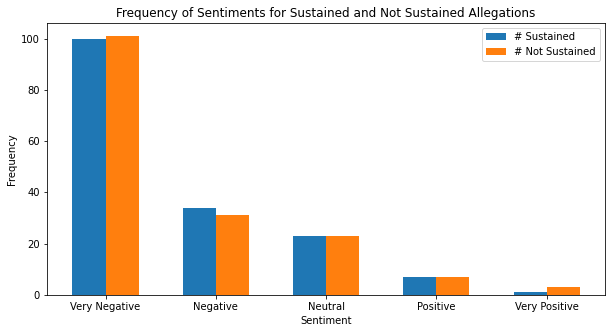

In [ ]:
N = 5

# Data on X-axis
out_su = pd.cut(su_scores_cleaned, bins=[-1, -.6, -.2, 0.2, 0.6, 1], include_lowest=True).value_counts()
out_ns = pd.cut(ns_scores_cleaned, bins=[-1, -.6, -.2, 0.2, 0.6, 1], include_lowest=True).value_counts()

# Specify the values of blue bars (height)
blue_bar = out_su
# Specify the values of orange bars (height)
orange_bar = out_ns

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='# Sustained')
plt.bar(ind + width, orange_bar, width, label='# Not Sustained')

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Frequency of Sentiments for Sustained and Not Sustained Allegations')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [ ]:
su_dict_cleaned = {}
for summary in cleaned_su:
  su_dict_cleaned[summary] = sentiment_analyzer.polarity_scores(summary)['compound']

newDict = dict(filter(lambda elem: elem[1] > 0.6, su_dict_cleaned.items()))
print(newDict.keys())

dict_keys(['was registered on-duty occurred 5th was alleged mishandled discharged was possible great bodily agreed'])


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
def lemmatize_sentence(sentence):
  for s in sentence:
    sentence_results = []
    sentence_results.append(nltk.word_tokenize(sentence))
    results_tuple = pos_tag(sentence_results[0])
    filter_set = set(['VBN', 'VBD', 'JJ'])
    results_filtered = [tup for tup in results_tuple if tup[1] in filter_set] # [("ran", "JJ"), ...]
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in results_filtered:
      if tag.startswith('VBN') or tag.startswith('VBD'):
        pos = 'v'
      else:
        pos = 'a'
      lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    # cleaned_results = [word[0] for word in results_filtered] #["ran", "harrassed", ...]
    return " ".join(lemmatized_sentence)
lemmas_SU = []
for summary in summaries_SU:
  lemmas_SU.append(lemmatize_sentence(summary))

lemmas_NS = []
for summary in summaries_NS:
  lemmas_NS.append(lemmatize_sentence(summary))

print(lemmas_SU[0])

be register off-duty occur be allege attempt direct biased refuse request other preliminary Simple be intoxicate off-duty Simple Based accuse recommend attempt direct biased agree refuse request other preliminary Simple be intoxicate off-duty Simple agree


In [ ]:
su_scores_lemmas = []
for summary in lemmas_SU:
  scores = sentiment_analyzer.polarity_scores(summary)['compound']
  su_scores_lemmas.append(scores)

ns_scores_lemmas = []
for summary in cleaned_ns:
  scores = sentiment_analyzer.polarity_scores(summary)['compound']
  ns_scores_lemmas.append(scores)

In [ ]:
print(su_scores_lemmas)

[-0.2263, -0.5574, -0.9118, -0.9274, -0.5423, 0.0, 0.3182, 0.25, -0.8779, 0.0, -0.9531, -0.9953, -0.1531, -0.34, -0.765, -0.7783, -0.2023, -0.8481, -0.1027, -0.9313, -0.9403, 0.25, 0.1779, 0.0258, -0.7506, 0.0258, -0.8885, -0.9716, 0.3612, 0.1531, -0.9945, -0.6908, 0.4588, -0.9118, 0.0, -0.9413, 0.34, 0.4767, 0.0258, -0.5859, -0.7845, -0.5423, -0.8271, -0.6908, -0.5423, -0.6808, -0.4939, -0.9633, -0.9712, -0.1779, 0.1779, -0.9871, -0.743, -0.8885, -0.743, -0.9955, 0.3612, 0.765, 0.0, -0.9612, -0.8176, -0.989, -0.7964, -0.8957, -0.6124, 0.0, -0.8885, 0.0, -0.0516, -0.9702, -0.9922, 0.3612, -0.3818, -0.5859, -0.1531, -0.6908, -0.2263, -0.9812, 0.25, 0.5106, -0.9201, -0.9812, -0.9893, 0.25, -0.9914, -0.1531, -0.8591, -0.765, -0.9753, -0.1531, -0.296, -0.9136, -0.5574, 0.34, -0.9451, -0.8442, 0.0, -0.2263, 0.0, 0.0772, -0.7783, 0.0, -0.743, 0.0, 0.0258, -0.8807, -0.2732, -0.5423, -0.7579, -0.7096, -0.3818, 0.0, -0.8271, -0.0258, -0.5574, -0.9062, -0.7964, -0.8957, -0.9682, -0.2732, 0.1779,

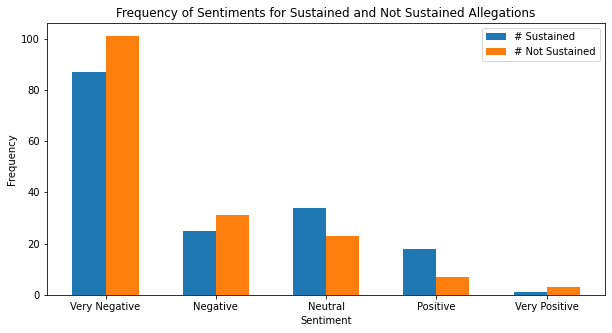

In [ ]:
N = 5

# Data on X-axis
out_su = pd.cut(su_scores_lemmas, bins=[-1, -.6, -.2, 0.2, 0.6, 1], include_lowest=True).value_counts()
out_ns = pd.cut(ns_scores_lemmas, bins=[-1, -.6, -.2, 0.2, 0.6, 1], include_lowest=True).value_counts()

# Specify the values of blue bars (height)
blue_bar = out_su
# Specify the values of orange bars (height)
orange_bar = out_ns

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='# Sustained')
plt.bar(ind + width, orange_bar, width, label='# Not Sustained')

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Frequency of Sentiments for Sustained and Not Sustained Allegations')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [ ]:
su_dict_lemmas = {}
for summary in lemmas_SU:
  su_dict_lemmas[summary] = sentiment_analyzer.polarity_scores(summary)['compound']

newDict = dict(filter(lambda elem: elem[1] > 0.6, su_dict_lemmas.items()))
print(newDict.keys())

dict_keys(['be register on-duty occur 5th be allege mishandle discharge be possible great bodily agree'])
